In [1162]:
%pylab inline

from __future__ import division

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
from matplotlib.collections import PatchCollection

from ipywidgets import interact, HTML, FloatSlider
from IPython.display import clear_output, display

import numba as nb

Populating the interactive namespace from numpy and matplotlib


In [1163]:
G = 6.67e-11

dt = 100
stepN = 6000

In [1164]:
xyDistribution = [
                 [1000.0, 1000.0],
                 [-1000.0, -1000.0],
                 ]

xyDistribution=np.array(xyDistribution)

nParticles = 2
# xyDistribution = np.random.normal(0, 2000, size = (nParticles, 2))

velocityDistribution = np.zeros_like(xyDistribution, dtype = np.float)


mDistribution = [10000000.0, 10000000.0]
# mDistribution = np.ones(nParticles, dtype=float) * 100000000

ParticlePositionHistory = np.zeros((nParticles,2,stepN))

timeArray = np.zeros(stepN)
for i in range(stepN):
    timeArray[i] = i*dt

[]

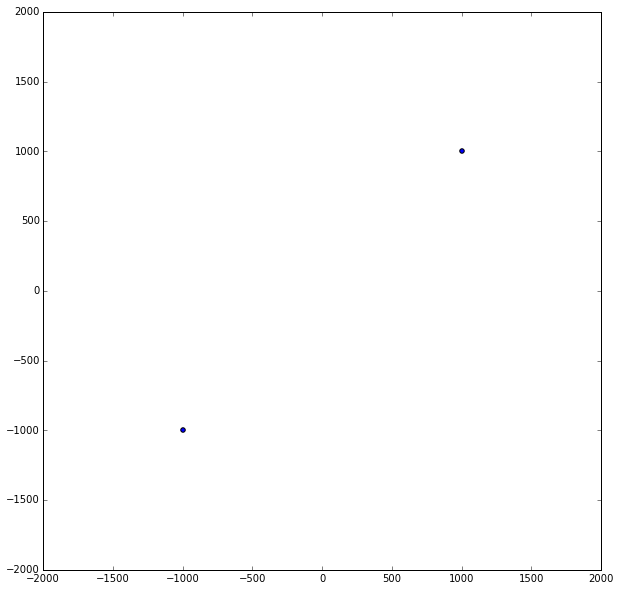

In [1165]:
plt.figure(figsize=(10,10))
plt.scatter(xyDistribution[:,0], xyDistribution[:,1], c='b')
plt.xlim(-2000, 2000)
plt.ylim(-2000, 2000)
plt.plot()

In [1166]:
def gravity(position):
    
    for i in range(0, len(mDistribution)):
        for j in range(0, len(mDistribution)):
            #print (i, j)
            if (j!=i):
                xdist = (position[i,0]-position[j,0])
                ydist = (position[i,1]-position[j,1])
                #print(xdist)
                #print(ydist)
                
                if(xdist==0):
                    velocityDistribution[i,0] += 0
                elif(xdist!=0):
                    velocityDistribution[i,0] += -G*mDistribution[j]*xdist/(abs(xdist)*(np.sqrt(abs(xdist))**2))
                    #print("blah", -G*mDistribution[i]/(np.sqrt(abs(position[j,0]-position[i,0]))**2))
                    #print("v", i, "x", velocityDistribution[i,0])
            
                if(ydist==0):
                    velocityDistribution[i,1] += 0
                elif(ydist!=0):
                    velocityDistribution[i,1] += -G*mDistribution[j]*ydist/(abs(ydist)*(np.sqrt(abs(ydist))**2))
                    #print("v", i, "y", velocityDistribution[i,1])
                    
    #print(velocityDistribution)
    return velocityDistribution

In [1167]:
def RK1(f, dt, position, stepN):
    
    t = 0
    for i in range(stepN):
        t+=dt
        position += dt*gravity(position)
        ParticlePositionHistory[:,:,i] = position
    #print(position)
    return position

In [1168]:
xyDistributionOld = np.copy(xyDistribution) 


numbaRK = nb.autojit(RK1)
numbaGrav = nb.autojit(gravity)
xyDistribution = RK1(gravity, dt, xyDistribution, stepN)

#uprint xyDistribution - xyDistributionOld


[]

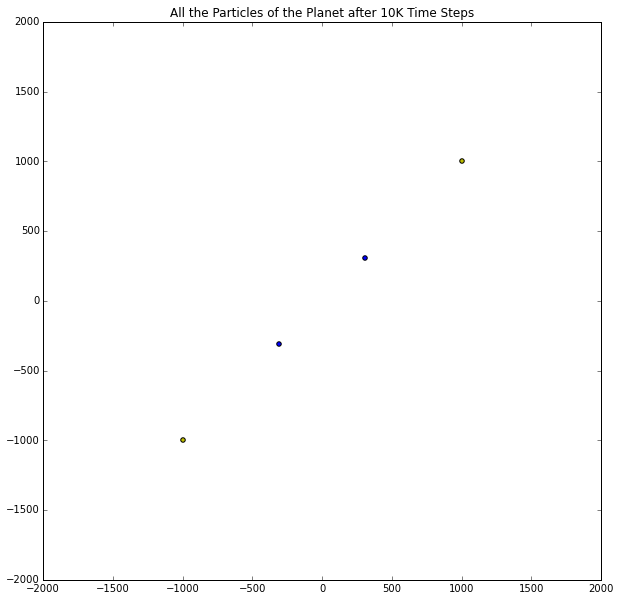

In [1169]:
plt.figure(figsize=(10,10))
plt.scatter(xyDistributionOld[:,0], xyDistributionOld[:,1], c='y')
plt.scatter(xyDistribution[:,0], xyDistribution[:,1], c='b')
plt.title("All the Particles of the Planet after 10K Time Steps")
plt.xlim(-2000, 2000)
plt.ylim(-2000, 2000)
plt.plot()

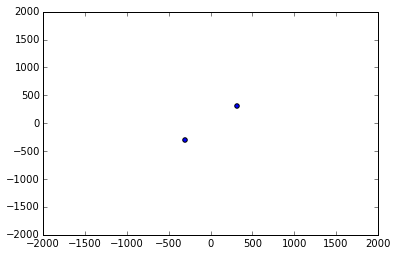

In [1170]:
slider = FloatSlider(description='Time', min=0, max=stepN, step=1)

def update_plot():
    time=slider.value
    x = ParticlePositionHistory[:,0,time-1]
    y = ParticlePositionHistory[:,1,time-1]
    fig = plt.figure()
    plt.scatter(x, y)
    plt.xlim(-2000,2000)
    plt.ylim(-2000, 2000)

    clear_output(True)

slider.on_trait_change(update_plot, 'value')


display(slider)
update_plot()